# CS105 Final Project

## 1.0 Library imports

In [1]:
import pandas as pd
import numpy as np
import json
import gzip
import warnings
warnings.filterwarnings("ignore")

## 2.0 Meet and greet the data

### 2.1 Load in data
- Call function parse(path)
- Call funcation getDF(path)
- Return the dataframe in its correct form
- A dataset should be split into two forms
    - One will contain our main dataframe which will not be touched unless for comparisons with our modified df
    - The second will contain our changed dataframe

In [2]:

def parse(path):
  """ This function will parse the json file and returns the memory of all the rows

  Args:
      path (string): path directory of where your data is saved on your computer

  Yields:
      object: json
  """
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

In [3]:
def getDF(path):
    """ This function will go through each row in the parse function and get the data into a pandas format

    Args:
        path (string): path directory of where your data is saved on your computer

    Returns:
       dataframe: main dataframe that holds our data
    """
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

In [4]:
# df = getDF(r'C:\Users\migue\Downloads\Cell_Phones_and_Accessories_5.json.gz')
# data_copy = getDF(r'C:\Users\migue\Downloads\Cell_Phones_and_Accessories_5.json.gz')

df = getDF('Cell_Phones_and_Accessories_5.json.gz')
data_copy = getDF('Cell_Phones_and_Accessories_5.json.gz')

### 2.2 Get familiar with the data 
- Get info from dataframe
- Get a random sample
- Check the length of the df
- Check dtypes 

In [5]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1128437 entries, 0 to 1128436
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   overall         1128437 non-null  float64
 1   verified        1128437 non-null  bool   
 2   reviewTime      1128437 non-null  object 
 3   reviewerID      1128437 non-null  object 
 4   asin            1128437 non-null  object 
 5   style           605241 non-null   object 
 6   reviewerName    1128302 non-null  object 
 7   reviewText      1127672 non-null  object 
 8   summary         1127920 non-null  object 
 9   unixReviewTime  1128437 non-null  int64  
 10  vote            92034 non-null    object 
 11  image           27107 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 104.4+ MB


In [6]:
data_copy.sample(1)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
895532,2.0,True,"05 16, 2016",A2Q6XPCPQJBKW0,B018F68R14,{'Color:': ' Pink'},Kristyna Smith,Discolored after a few weeks,Two Stars,1463356800,NaN,NaN


In [7]:
print("The total length of the dataset: ", len(data_copy))

The total length of the dataset:  1128437


In [8]:
print("The data types of each respective column: ")
print(data_copy.dtypes)

The data types of each respective column: 
overall           float64
verified             bool
reviewTime         object
reviewerID         object
asin               object
style              object
reviewerName       object
reviewText         object
summary            object
unixReviewTime      int64
vote               object
image              object
dtype: object


In [9]:
print("The shape of the dataset: ", data_copy.shape)

The shape of the dataset:  (1128437, 12)


In [10]:
print("Statistical analysis of the numerical values in the dataset: ")
data_copy.describe().transpose()

Statistical analysis of the numerical values in the dataset: 


,count,mean,std,min,25%,50%,75%,max
overall,1128437.0,4.221383e+00,1.231917e+00,1.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
unixReviewTime,1128437.0,1.440400e+09,4.569215e+07,1.035331e+09,1.416355e+09,1.444349e+09,1.470442e+09,1.538438e+09


In [11]:
print(data_copy.groupby('overall').size())
#MAKE THIS A CHART


overall
1.0     81539
2.0     57175
3.0     98254
4.0    184431
5.0    707038
dtype: int64


<AxesSubplot: xlabel='overall'>

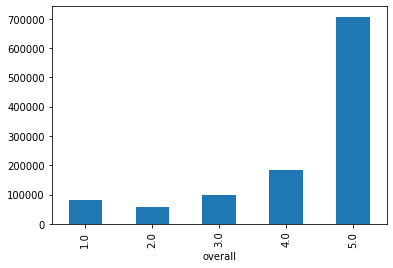

In [12]:
data_copy.groupby('overall').size().plot.bar()

In [13]:
data_copy['overall'].describe()

count    1.128437e+06
mean     4.221383e+00
std      1.231917e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: overall, dtype: float64

In [14]:
print("Skewness: %f" % data_copy['overall'].skew())
print("Kurtosis: %f" % data_copy['overall'].kurt())

Skewness: -1.516705
Kurtosis: 1.098529


Based off the kurtosis we have no outliers since our data is < 3.0. Our skewness is negative meaning we have a long tail on the left side of the graph.

### Relationship with Numerical Variables

The only numerical value is the unix review time column, which is pointless so we will drop this column anyways. We will run a feature selection later on to determine if my hypothesis is correct.

### Relationship with Binary Variables

In [15]:
data_copy.sample(1)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
478997,5.0,True,"09 24, 2017",A3LM0AR3OFM9AE,B00LR9ZBES,NaN,VITYA,Perfect for ipod shuffle.,Five Stars,1506211200,NaN,NaN


<AxesSubplot: xlabel='overall'>

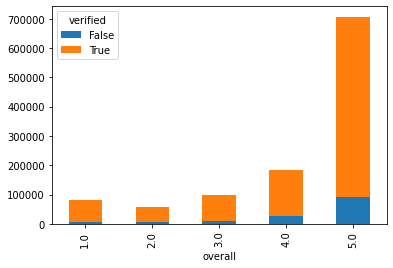

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


data_copy.groupby(['overall', 'verified']).size().unstack().plot(kind='bar', stacked=True)

### Relationship with Categorical Variables

In [17]:
df_agg = data_copy.groupby(['overall', 'asin']).size()

In [18]:
df_agg.nlargest(10)

overall  asin      
5.0      B00VH88CJ0    1426
         B00X5RV14Y    1311
         B019PV2I3G    1282
         B00P7N0320    1258
         B018JW3EOY    1252
         B005NF5NTK    1224
         B00MQSMDYU    1090
         B00M51DDT2    1023
         B00G7UY3EG    1014
         B00IGISUTG     910
dtype: int64

## 3.0 The 4 C's of data cleaning: completing, correction, creating, and converting

### 3.1 Completing 
- Completing missing information

In [19]:
testDF = data_copy[["overall","verified"]]

testDF["overall"] = testDF["overall"].fillna(7)
print(testDF.groupby('overall').size())


overall
1.0     81539
2.0     57175
3.0     98254
4.0    184431
5.0    707038
dtype: int64


In [20]:
avgRating = testDF.loc[:, 'overall'].mean()
display(avgRating)

4.221383205265336

In [21]:
data_copy.isnull().sum()

overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
style              523196
reviewerName          135
reviewText            765
summary               517
unixReviewTime          0
vote              1036403
image             1101330
dtype: int64

In [22]:
def get_nan_ocols(df, nan_percent=0.7):
    """ This function will determine what columns to drop based on our threshold

    Args:
        df (pandas df): dataframe that holds our data
        nan_percent (float, optional): Defaults to 0.7.

    Returns:
        list: list of columns to drop based on our threshold
    """
    threshold = len(df.index) * nan_percent
    return [c for c in df.columns if df[c].isnull().sum() >= threshold]

In [23]:
cols_to_del = get_nan_ocols(data_copy, .7)
cols_to_del

['vote', 'image']

In [24]:
data_copy = data_copy.drop(['vote', 'image'], axis=1)

In [25]:
data_copy.sample(1)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
443869,5.0,True,"10 13, 2015",A3T6NTAQAMOMBX,B00KH9H3EA,NaN,S.A.Reynolds,Just as expected!,Five Stars,1444694400


In [26]:
data_copy = data_copy.drop(['style'], axis=1)

In [27]:
data_copy.sample(1)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime
974443,5.0,False,"06 25, 2016",ADAYZNOEHZ6MA,B01DGCW40M,melissa Brewer,Absolutely perfect for my Husband & son...one ...,Handy card/money holder,1466812800


In [28]:
data_copy.isnull().sum()

overall             0
verified            0
reviewTime          0
reviewerID          0
asin                0
reviewerName      135
reviewText        765
summary           517
unixReviewTime      0
dtype: int64

In [29]:
data_copy = data_copy.dropna(axis=0)

In [30]:
data_copy.isnull().sum()

overall           0
verified          0
reviewTime        0
reviewerID        0
asin              0
reviewerName      0
reviewText        0
summary           0
unixReviewTime    0
dtype: int64

In [31]:
data_copy.sample(1)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime
138043,2.0,True,"05 15, 2017",A1ZM7AD7KJTD5H,B0092KJ9BU,Waynesworld,returned used,Two Stars,1494806400


### 3.2 Correction
- Correcting values and outliers
- We could have possible outliers in any of the numeric columns

In [32]:
print(data_copy.dtypes)

overall           float64
verified             bool
reviewTime         object
reviewerID         object
asin               object
reviewerName       object
reviewText         object
summary            object
unixReviewTime      int64
dtype: object


There are only 2 columns that have the possibility of outliers, since every other column is qualitative. The "overall" column is categorical, so there are no outliers. There are no outliers in the 'unixReviewTime' column because there are no outliers in time. 

### 3.3 Feature engineering
- Creating new features for analysis

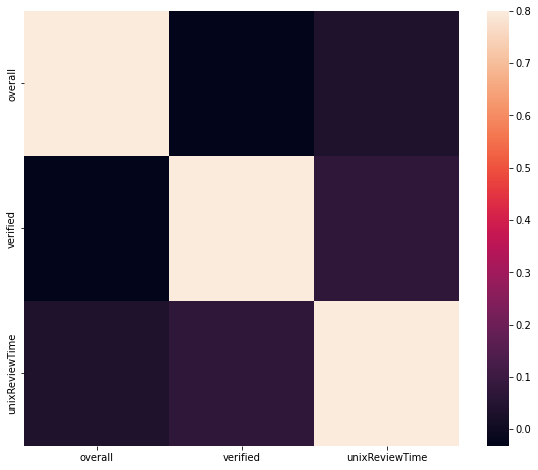

In [33]:
corrmat = data_copy.corr()
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corrmat, vmax=.8, square=True);

In [34]:
from collections import Counter

Counter(" ".join(data_copy["reviewText"]).split()).most_common(10)

[('the', 2642498),
 ('I', 1573835),
 ('and', 1544640),
 ('a', 1387288),
 ('to', 1370396),
 ('it', 1142315),
 ('is', 967619),
 ('my', 733928),
 ('for', 723025),
 ('of', 714158)]

### 3.4 Converting 
- Converting fields to the correct format for calculations and presentation

In [35]:
# verified & ratings DF
testDF2 = data_copy[["overall","verified"]]
display(testDF2.dtypes)

testDF2['verified'] = testDF2['verified'].map({True: '1', False: '2'}) 

testDF2.head()

overall     float64
verified       bool
dtype: object

,overall,verified
0,5.0,1
1,5.0,1
2,3.0,1
3,2.0,1
4,4.0,1


In [36]:
print(testDF2.dtypes)

overall     float64
verified     object
dtype: object


In [37]:
testDF2["verified"] = testDF2["verified"].astype(int)

In [38]:
print(testDF2.dtypes)

overall     float64
verified      int32
dtype: object


In [39]:
crossTB = pd.crosstab(testDF2.overall, testDF2.verified)
display(crossTB)

verified,1,2
overall,,
1.0,73708,7748
2.0,51443,5707
3.0,87870,10308
4.0,157735,26526
5.0,615302,90726


<AxesSubplot: xlabel='verified', ylabel='overall'>

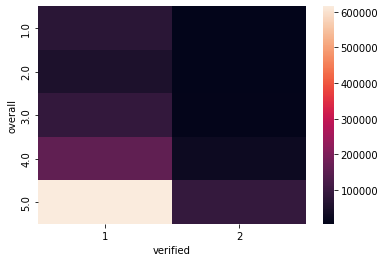

In [40]:
sns.heatmap(crossTB)


The heatmap shows that there are more verified users than non-verified users leaving reviews. The rating of 5 was the most common among the two types of users. The majority of reviews are from verified users with a rating of 5. 

<AxesSubplot: >

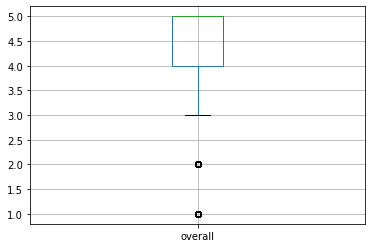

In [41]:
box_df = data_copy[["overall"]]
box_df.boxplot(column= ["overall"])

The boxplot shows that the majority of ratings are between 4 and 5.

<AxesSubplot: >

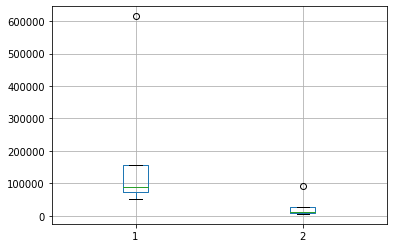

In [42]:
crossTB.boxplot()

This boxplot shows that there are more verified users than non-verified users leaving reviews.

<AxesSubplot: xlabel='overall'>

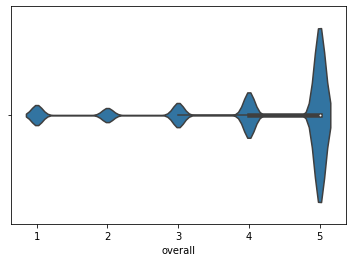

In [43]:
sns.violinplot(x = data_copy["overall"])


The violin plot shows that the majority of reviews have a rating of 5.

### Chi-Square test for variables "overall" and "verified"

Null hypothesis: The variables "overall" and "verified" are independent.

In [44]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2


chi, p, dfree, expected = chi2_contingency(crossTB)
print("calculated chi square value: " ,chi)
print("calculated p value: " ,p)
print("degree of freedom: ", dfree)


calculated chi square value:  2037.4474606635276
calculated p value:  0.0
degree of freedom:  4


In [45]:
print("for 4 degrees of freedom, the chi-square value needed to reject the hypothesis at the 0.05 significance level:")
chi2.ppf(0.95, 4)

for 4 degrees of freedom, the chi-square value needed to reject the hypothesis at the 0.05 significance level:


9.487729036781154

The chi-square value is found to be 2037. Since the value 9.488 is less than 2037, the null hypothesis is rejected. The variables affect each other.

### Pearson Correlation

In [46]:
testDF2.overall.corr(testDF2.verified, method = 'pearson')

0.031742883517648736

The value is near 0, so the variables have little to no correlation. There is a weak positive linear relationship.

## 4.0 Build model

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder #used for one-hot encoding

temp = data_copy[:10000]

le = LabelEncoder() 
y = le.fit_transform(temp['overall'].values)

In [48]:
from sklearn.metrics import f1_score, recall_score, precision_score
import numpy as np

In [49]:
X = temp['reviewText']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = .2, random_state=69
)

In [50]:
print(X_train.shape)
X_test.shape

(8000,)


(2000,)

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
vectorizer.fit(list(X_train) + list(X_test)) #if the vectorizer is not same size as dataset, then the code breaks

X_train_vectorizer = vectorizer.transform(X_train)
X_test_vectorizer = vectorizer.transform(X_test)

In [52]:
pd_array = pd.DataFrame(X_train_vectorizer.toarray()) #helps visual the one-hot encoding for you guys to read
pd_array

,0,1,2,3,4,5,6,7,8,9,...,16980,16981,16982,16983,16984,16985,16986,16987,16988,16989
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def print_confusion_matrix(y_test, y_pred):
    cmatrix = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cmatrix)
    cm_display.plot();

In [54]:
from sklearn.metrics import classification_report

def print_classification_report(y_test, y_pred, model_name):
    print("Classification report for " + str(model_name) + ": ")
    print(classification_report(y_test, y_pred, digits=4))

In [55]:
from sklearn.linear_model import LogisticRegression

accuracy_metric = {}

lr_model = LogisticRegression()
lr_model.fit(X_train_vectorizer, y_train)

lr_y_pred = lr_model.predict(X_test_vectorizer)

acc = lr_model.score(X_test_vectorizer, y_test)*100
accuracy_metric['Logistic Regression'] = acc

print("Logistic Regression Accuracy:  {:.2f}%".format(acc))

Logistic Regression Accuracy:  61.75%


In [56]:
from xgboost import  XGBClassifier

xg = XGBClassifier()
xg.fit(X_train_vectorizer, y_train)

xg_y_pred = xg.predict(X_test_vectorizer)

acc = xg.score(X_test_vectorizer, y_test)*100
accuracy_metric['XGBoost'] = acc
print("XGBoost Accuracy:  {:.2f}%".format(acc))


XGBoost Accuracy:  65.45%


In [57]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train_vectorizer, y_train)

nb_y_pred = nb_model.predict(X_test_vectorizer)
predictions = [round(value) for value in nb_y_pred]

acc = nb_model.score(X_test_vectorizer, y_test)*100
accuracy_metric['Naive Bayes'] = acc

print("Naive Bayes Accuracy:  {:.2f}%".format(acc))

Naive Bayes Accuracy:  50.65%


In [58]:
from sklearn.ensemble import RandomForestClassifier

forest_classifier = RandomForestClassifier()
forest_classifier.fit(X_train_vectorizer, y_train)

rfc_y_pred = forest_classifier.predict(X_test_vectorizer)
predictions = [round(value) for value in rfc_y_pred]

acc = forest_classifier.score(X_test_vectorizer, y_test)*100
accuracy_metric['Random Forest'] = acc 

print("Random Forest Accuracy:  {:.2f}%".format(acc))

Random Forest Accuracy:  66.60%


## 5.0 Evaluate model

In [59]:
accuracy_df = pd.DataFrame.from_dict(accuracy_metric, orient='index')
accuracy_df = accuracy_df.rename(columns={0: 'Test Scores'})
accuracy_df

,Test Scores
Logistic Regression,61.75
XGBoost,65.45
Naive Bayes,50.65
Random Forest,66.60


### Logistic Regression Evaluation

In [60]:
print_classification_report(y_test=y_test, y_pred=lr_y_pred, model_name=lr_model)

Classification report for LogisticRegression(): 
              precision    recall  f1-score   support

           0     0.7330    0.5584    0.6339       231
           1     0.7273    0.1103    0.1916       145
           2     0.4744    0.1705    0.2508       217
           3     0.4274    0.2637    0.3262       402
           4     0.6416    0.9423    0.7634      1005

    accuracy                         0.6175      2000
   macro avg     0.6007    0.4091    0.4332      2000
weighted avg     0.5972    0.6175    0.5635      2000



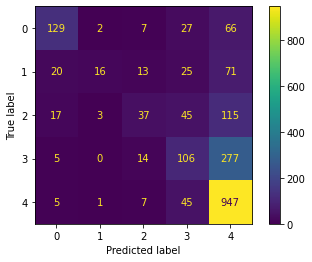

In [61]:
print_confusion_matrix(y_test=y_test, y_pred=lr_y_pred)

Darker colors mean our model was not able to correctly predict the label while lighter colors mean the model was correct.

Darker colors mean our model was not able to correctly predict the label while lighter colors mean the model was correct.

### XGBoost

### Random Forest

## 6.0 Hyperparameter tuning

In [62]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import accuracy_score

### Logistic Regression Tuning

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
# lr_parameters = {'C':[1, 10], 'solver': ['sag', 'saga'], 'max_iter': [100, 250, 500, 750, 1000]}
# lr_gridsearch = GridSearchCV(lr_model, lr_parameters)
# lr_gridsearch.fit(X_train_vectorizer, y_train)
# GridSearchCV(estimator=LogisticRegression(),
#              param_grid={'C':[1, 10], 'solver': ['sag', 'saga'], 'max_iter': [100, 250, 500, 750, 1000]})

# print(lr_gridsearch.best_params_) 
# lr_grid_predictions = lr_gridsearch.predict(X_test_vectorizer) 
   
# print_classification_report(y_test=y_test, y_pred=lr_grid_predictions, model_name=lr_gridsearch) 

### XGB Tuning

In [65]:
# XGB_parameters = {'gamma':[0, 2, 5, 6, 10], 'colsample_bylevel': [0, .2, .5, .75, 1], 'alpha': [0, 1, 2, 5, 10], 'max_depth': [0, 2, 5, 6, 10]}
# XGB_gridsearch = GridSearchCV(xg, XGB_parameters)
# XGB_gridsearch.fit(X_train_vectorizer, y_train)
# GridSearchCV(estimator=XGBClassifier(),
#              param_grid=XGB_parameters)

# print(XGB_gridsearch.best_params_) 
# XGB_grid_predictions = XGB_gridsearch.predict(X_test_vectorizer) 
   
# print_classification_report(y_test=y_test, y_pred=XGB_grid_predictions, model_name=XGB_gridsearch) 

### Random Forest Classifier Tuning

In [66]:
# rfc_parameters = {'n_estimators':[100, 200], 'criterion':['gini'], 'max_depth':[None, 1, 2]}
# rfc_gridsearch = GridSearchCV(forest_classifier, rfc_parameters)
# rfc_gridsearch.fit(X_train_vectorizer, y_train)
# GridSearchCV(estimator=RandomForestClassifier(), 
#              param_grid=rfc_parameters)

# print(rfc_gridsearch.best_params_) 
# rfc_grid_predictions = rfc_gridsearch.predict(X_test_vectorizer) 
   
# print_classification_report(y_test=y_test, y_pred=rfc_grid_predictions, model_name=rfc_gridsearch) 

In [67]:
# lr_model_tuned = LogisticRegression(C=10, max_iter=250, solver='saga')
# lr_model_tuned.fit(X_train_vectorizer, y_train)

# lr_model_tuned_y_preds = lr_model_tuned.predict(X_test_vectorizer)

# print_classification_report(y_test=y_test, y_pred=lr_model_tuned_y_preds, model_name=lr_model_tuned)